In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import streamlit as st

In [ ]:
pip install scipy

In [ ]:
pip install upgrade pip

In [ ]:
pip install Pillow

In [2]:
# Download and extract dataset

data_dir = 'cats_and_dogs_filtered/cats_and_dogs_filtered/'


In [3]:
data_dir

'cats_and_dogs_filtered/cats_and_dogs_filtered/'

In [4]:

train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')



In [5]:
len(validation_dir)

56

In [6]:
# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)



In [7]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = val_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



c:\Users\RAHUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [10]:
# Train Model
epochs = 10
history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs)



c:\Users\RAHUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4947 - loss: 0.8977

c:\Users\RAHUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.4947 - loss: 0.8955 - val_accuracy: 0.5540 - val_loss: 0.6904
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 800ms/step - accuracy: 0.5232 - loss: 0.6933 - val_accuracy: 0.5300 - val_loss: 0.6780
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 795ms/step - accuracy: 0.5786 - loss: 0.6724 - val_accuracy: 0.5570 - val_loss: 0.7170
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 797ms/step - accuracy: 0.6362 - loss: 0.6310 - val_accuracy: 0.6530 - val_loss: 0.6261
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 804ms/step - accuracy: 0.6770 - loss: 0.6049 - val_accuracy: 0.6570 - val_loss: 0.6174
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 769ms/step - accuracy: 0.6869 - loss: 0.5919 - val_accuracy: 0.7230 - val_loss: 0.5578
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 782ms/step - accuracy: 0.7495 - loss: 0.5220 - val_accuracy: 0.7320 - val_loss: 0.5525
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 775ms/step - accuracy: 0.7346 - loss: 0.5162 - val_accuracy: 0.7360 

In [11]:
# Save Model
model.save("cat_dog_classifier.h5")



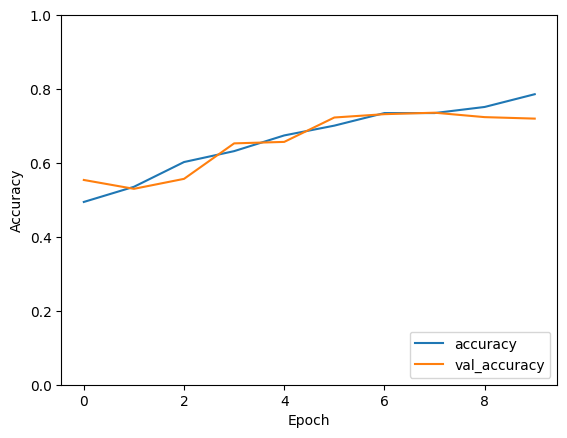

In [12]:
# Plot Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

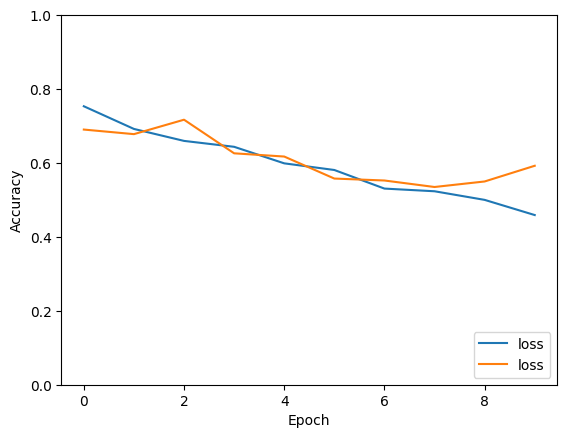

In [13]:
# Plot Training History
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()